In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy as sp
from collections import OrderedDict
from theano import shared, tensor as tt

%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

#### Code 11.1

In [2]:
trolley_df = pd.read_csv('Data/Trolley.csv', sep=';')
trolley_df.head()

,case,response,order,id,age,male,edu,action,intention,contact,story,action2
0,cfaqu,4,2,96;434,14,0,Middle School,0,0,1,aqu,1
1,cfbur,3,31,96;434,14,0,Middle School,0,0,1,bur,1
2,cfrub,4,16,96;434,14,0,Middle School,0,0,1,rub,1
3,cibox,3,32,96;434,14,0,Middle School,0,1,1,box,1
4,cibur,3,4,96;434,14,0,Middle School,0,1,1,bur,1


#### Code 11.2

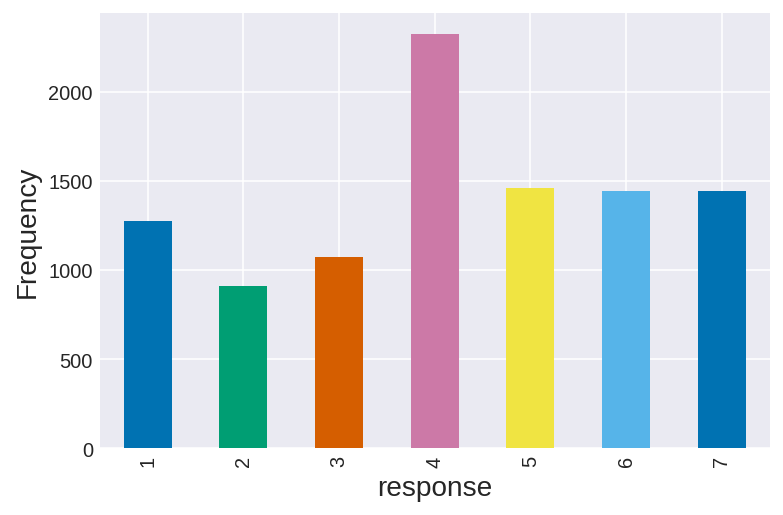

In [3]:
ax = (trolley_df.response
                .value_counts()
                .sort_index()
                .plot(kind='bar'))

ax.set_xlabel("response", fontsize=14);
ax.set_ylabel("Frequency", fontsize=14);

#### Code 11.3

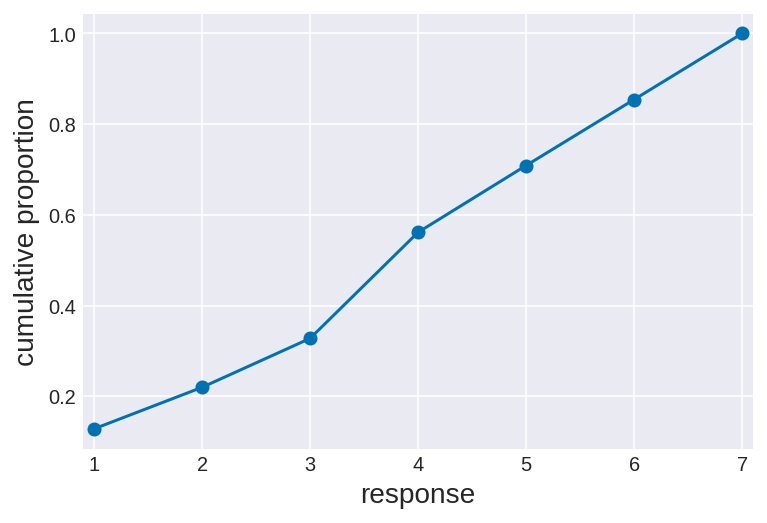

In [4]:
ax = (trolley_df.response
                .value_counts()
                .sort_index()
                .cumsum()
                .div(trolley_df.shape[0])
                .plot(marker='o'))

ax.set_xlim(0.9, 7.1);
ax.set_xlabel("response", fontsize=14)
ax.set_ylabel("cumulative proportion", fontsize=14);

#### Code 11.4

In [5]:
resp_lco = (trolley_df.response
                      .value_counts()
                      .sort_index()
                      .cumsum()
                      .iloc[:-1]
                      .div(trolley_df.shape[0])
                      .apply(lambda p: np.log(p / (1. - p))))

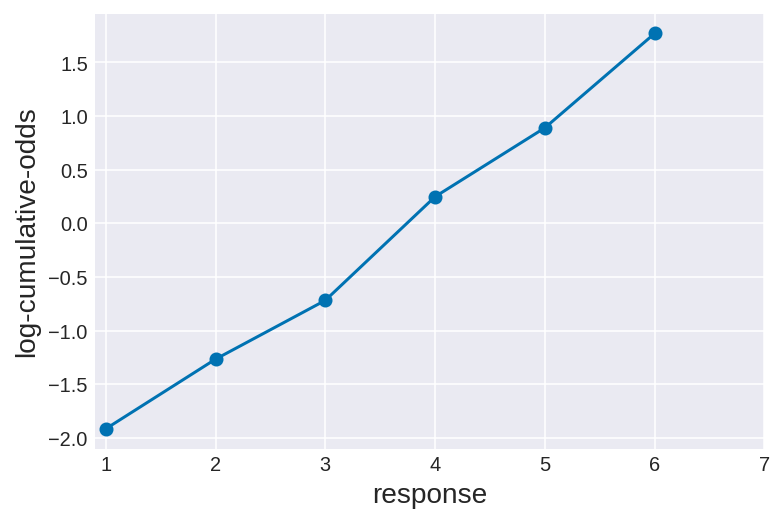

In [6]:
ax = resp_lco.plot(marker='o')

ax.set_xlim(0.9, 7);
ax.set_xlabel("response", fontsize=14)
ax.set_ylabel("log-cumulative-odds", fontsize=14);

#### Code 11.5

In [7]:
with pm.Model() as m11_1:
    a = pm.Normal(
        'a', 0., 10.,
        transform=pm.distributions.transforms.ordered,
        shape=6, testval=np.arange(6) - 2.5)
    
    resp_obs = pm.OrderedLogistic(
        'resp_obs', 0., a,
        observed=trolley_df.response - 1
    )

/home/damianos/.conda/envs/statRethinkPymc3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/home/damianos/.conda/envs/statRethinkPymc3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


In [8]:
with m11_1:
    map_11_1 = pm.find_MAP()

/home/damianos/.conda/envs/statRethinkPymc3/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
  0%|          | 0/5000 [00:00<?, ?it/s]/home/damianos/.conda/envs/statRethinkPymc3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
logp = -18,941, ||grad|| = 0.45229: 100%|██████████| 14/14 [00:00<00:00, 510.50it/s]  


#### Code 11.6

In [9]:
map_11_1['a']

array([-1.9160707 , -1.26658298, -0.71862013,  0.24778795,  0.88986631,
        1.76937289])

#### Code 11.7

In [10]:
sp.special.expit(map_11_1['a'])

array([0.12830038, 0.21984275, 0.32769691, 0.56163196, 0.70886258,
       0.85437967])

#### Code 11.8

In [11]:
with m11_1:
    trace_11_1 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/home/damianos/.conda/envs/statRethinkPymc3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:26<00:00, 149.14draws/s]


In [12]:
pm.summary(trace_11_1, varnames=['a'], alpha=.11).round(2)

,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
a__0,-1.92,0.03,0.0,-1.97,-1.87,2111.31,1.0
a__1,-1.27,0.02,0.0,-1.31,-1.23,3164.34,1.0
a__2,-0.72,0.02,0.0,-0.75,-0.68,2728.94,1.0
a__3,0.25,0.02,0.0,0.21,0.28,2303.36,1.0
a__4,0.89,0.02,0.0,0.85,0.92,2154.86,1.0
a__5,1.77,0.03,0.0,1.73,1.82,2650.76,1.0


#### Code 11.9

In [13]:
def ordered_logistic_proba(a):
    pa = sp.special.expit(a)
    p_cum = np.concatenate(([0.], pa, [1.]))
    
    return p_cum[1:] - p_cum[:-1]

In [14]:
ordered_logistic_proba(trace_11_1['a'].mean(axis=0))

array([0.1281951 , 0.0915642 , 0.10794263, 0.23392989, 0.14730283,
       0.14560529, 0.14546007])

#### Code 11.10

In [15]:
(ordered_logistic_proba(trace_11_1['a'].mean(axis=0)) \
     * (1 + np.arange(7))).sum()

4.199237303751577

#### Code 11.11

In [16]:
ordered_logistic_proba(trace_11_1['a'].mean(axis=0) - 0.5)

array([0.08188458, 0.06402254, 0.08227625, 0.20909558, 0.15905561,
       0.18452141, 0.21914402])

#### Code 11.12

In [17]:
(ordered_logistic_proba(trace_11_1['a'].mean(axis=0) - 0.5) \
     * (1 + np.arange(7))).sum()

4.729555395832244

#### Code 11.13

In [18]:
action = shared(trolley_df.action.values)
intention = shared(trolley_df.intention.values)
contact = shared(trolley_df.contact.values)

with pm.Model() as m11_2:
    a = pm.Normal(
        'a', 0., 10.,
        transform=pm.distributions.transforms.ordered,
        shape=6,
        testval=trace_11_1['a'].mean(axis=0)
    )
    
    bA = pm.Normal('bA', 0., 10.)
    bI = pm.Normal('bI', 0., 10.)
    bC = pm.Normal('bC', 0., 10.)
    phi = bA * action + bI * intention + bC * contact

    resp_obs = pm.OrderedLogistic(
        'resp_obs', phi, a,
        observed=trolley_df.response - 1
    )

/home/damianos/.conda/envs/statRethinkPymc3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


In [19]:
with m11_2:
    map_11_2 = pm.find_MAP()

/home/damianos/.conda/envs/statRethinkPymc3/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
  0%|          | 0/5000 [00:00<?, ?it/s]/home/damianos/.conda/envs/statRethinkPymc3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
logp = -18,565, ||grad|| = 3.7514: 100%|██████████| 16/16 [00:00<00:00, 90.85it/s]  


In [20]:
map_11_2

{'a_ordered__': array([-2.83721967, -0.38293879, -0.54047889,  0.02125586, -0.40327018,
        -0.09802991]),
 'bA': array(-0.70908126),
 'bI': array(-0.72036438),
 'bC': array(-0.96133837),
 'a': array([-2.83721967, -2.15536503, -1.57289579, -0.55141242,  0.11671914,
         1.02334093])}

#### Code 11.14

In [21]:
with pm.Model() as m11_3:
    a = pm.Normal(
        'a', 0., 10.,
        transform=pm.distributions.transforms.ordered,
        shape=6,
        testval=trace_11_1['a'].mean(axis=0)
    )
    
    bA = pm.Normal('bA', 0., 10.)
    bI = pm.Normal('bI', 0., 10.)
    bC = pm.Normal('bC', 0., 10.)
    bAI = pm.Normal('bAI', 0., 10.)
    bCI = pm.Normal('bCI', 0., 10.)
    phi  = bA * action + bI * intention + bC * contact \
            + bAI * action * intention \
            + bCI * contact * intention

    resp_obs = pm.OrderedLogistic(
        'resp_obs', phi, a,
        observed=trolley_df.response - 1
    )

In [22]:
with m11_3:
    map_11_3 = pm.find_MAP()

/home/damianos/.conda/envs/statRethinkPymc3/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
  0%|          | 0/5000 [00:00<?, ?it/s]/home/damianos/.conda/envs/statRethinkPymc3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
logp = -18,489, ||grad|| = 0.90432: 100%|██████████| 25/25 [00:00<00:00, 105.80it/s]  


In [23]:
map_11_3

{'a_ordered__': array([-2.63470443, -0.36231058, -0.51870952,  0.03489647, -0.39892176,
        -0.09873509]),
 'bA': array(-0.47229242),
 'bI': array(-0.28263057),
 'bC': array(-0.33147858),
 'bAI': array(-0.44643093),
 'bCI': array(-1.27266566),
 'a': array([-2.63470443, -1.93863828, -1.34335002, -0.30783752,  0.36320568,
         1.26918837])}

#### Code 11.15

In [24]:
def get_coefs(map_est):
    coefs = OrderedDict()
    
    for i, ai in enumerate(map_est['a']):
        coefs['a_{}'.format(i)] = ai
        
    coefs['bA'] = map_est.get('bA', np.nan)
    coefs['bI'] = map_est.get('bI', np.nan)
    coefs['bC'] = map_est.get('bC', np.nan)
    coefs['bAI'] = map_est.get('bAI', np.nan)
    coefs['bCI'] = map_est.get('bCI', np.nan)
        
    return coefs

In [25]:
(pd.DataFrame.from_dict(
    OrderedDict([
        ('m11_1', get_coefs(map_11_1)),
        ('m11_2', get_coefs(map_11_2)),
        ('m11_3', get_coefs(map_11_3))
    ]))
   .astype(np.float64)
   .round(2))

,m11_1,m11_2,m11_3
a_0,-1.92,-2.84,-2.63
a_1,-1.27,-2.16,-1.94
a_2,-0.72,-1.57,-1.34
a_3,0.25,-0.55,-0.31
a_4,0.89,0.12,0.36
a_5,1.77,1.02,1.27
bA,NaN,-0.71,-0.47
bAI,NaN,NaN,-0.45
bC,NaN,-0.96,-0.33
bCI,NaN,NaN,-1.27


#### Code 11.16

In [26]:
with m11_2:
    trace_11_2 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/home/damianos/.conda/envs/statRethinkPymc3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [bC, bI, bA, a]
Sampling 2 chains: 100%|██████████| 4000/4000 [03:08<00:00, 21.21draws/s]


In [27]:
with m11_3:
    trace_11_3 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/home/damianos/.conda/envs/statRethinkPymc3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [bCI, bAI, bC, bI, bA, a]
Sampling 2 chains: 100%|██████████| 4000/4000 [03:42<00:00, 18.00draws/s]


In [28]:
comp_df = pm.compare({m11_1:trace_11_1,
                      m11_2:trace_11_2,
                      m11_3:trace_11_3})

comp_df.loc[:,'model'] = pd.Series(['m11.1', 'm11.2', 'm11.3'])
comp_df = comp_df.set_index('model')
comp_df

/home/damianos/.conda/envs/statRethinkPymc3/lib/python3.7/site-packages/pymc3/stats.py:167: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.stack(logp)


,WAIC,pWAIC,dWAIC,weight,SE,dSE,var_warn
model,,,,,,,
m11.3,36929.4,11.14,0,0.96,81.25,0,0
m11.2,37089.6,8.89,160.22,0,76.3,25.68,0
m11.1,37854.3,5.93,924.91,0.04,57.65,62.66,0


#### Code 11.17-19

In [29]:
pp_df = pd.DataFrame(np.array([[0, 0, 0],
                               [0, 0, 1],
                               [1, 0, 0],
                               [1, 0, 1],
                               [0, 1, 0],
                               [0, 1, 1]]),
                     columns=['action', 'contact', 'intention'])

In [30]:
pp_df

,action,contact,intention
0,0,0,0
1,0,0,1
2,1,0,0
3,1,0,1
4,0,1,0
5,0,1,1


In [31]:
action.set_value(pp_df.action.values)
contact.set_value(pp_df.contact.values)
intention.set_value(pp_df.intention.values)

with m11_3:
    pp_trace_11_3 = pm.sample_ppc(trace_11_3, samples=9000)

/home/damianos/.conda/envs/statRethinkPymc3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  
100%|██████████| 9000/9000 [00:17<00:00, 523.13it/s]


In [32]:
# store cumulative probabilities for each combination of predictors (rows)
# and each outcome (columns) (except the k=7 which is always 1)
cum_probs = np.zeros((6, 6))
list_dfs = []
for trace_ in np.array_split(pp_trace_11_3['resp_obs'], 6):
    for i, column in enumerate(trace_.T):
        counts_temp = [(column==i).sum()/column.shape[0] for i in range(7)]
        counts_temp = np.cumsum(counts_temp)
        #(except the k=7 which is always 1)
        cum_probs[i, :] = counts_temp[:-1]
    list_dfs.append(pd.concat([pp_df, pd.DataFrame(cum_probs)], axis=1))

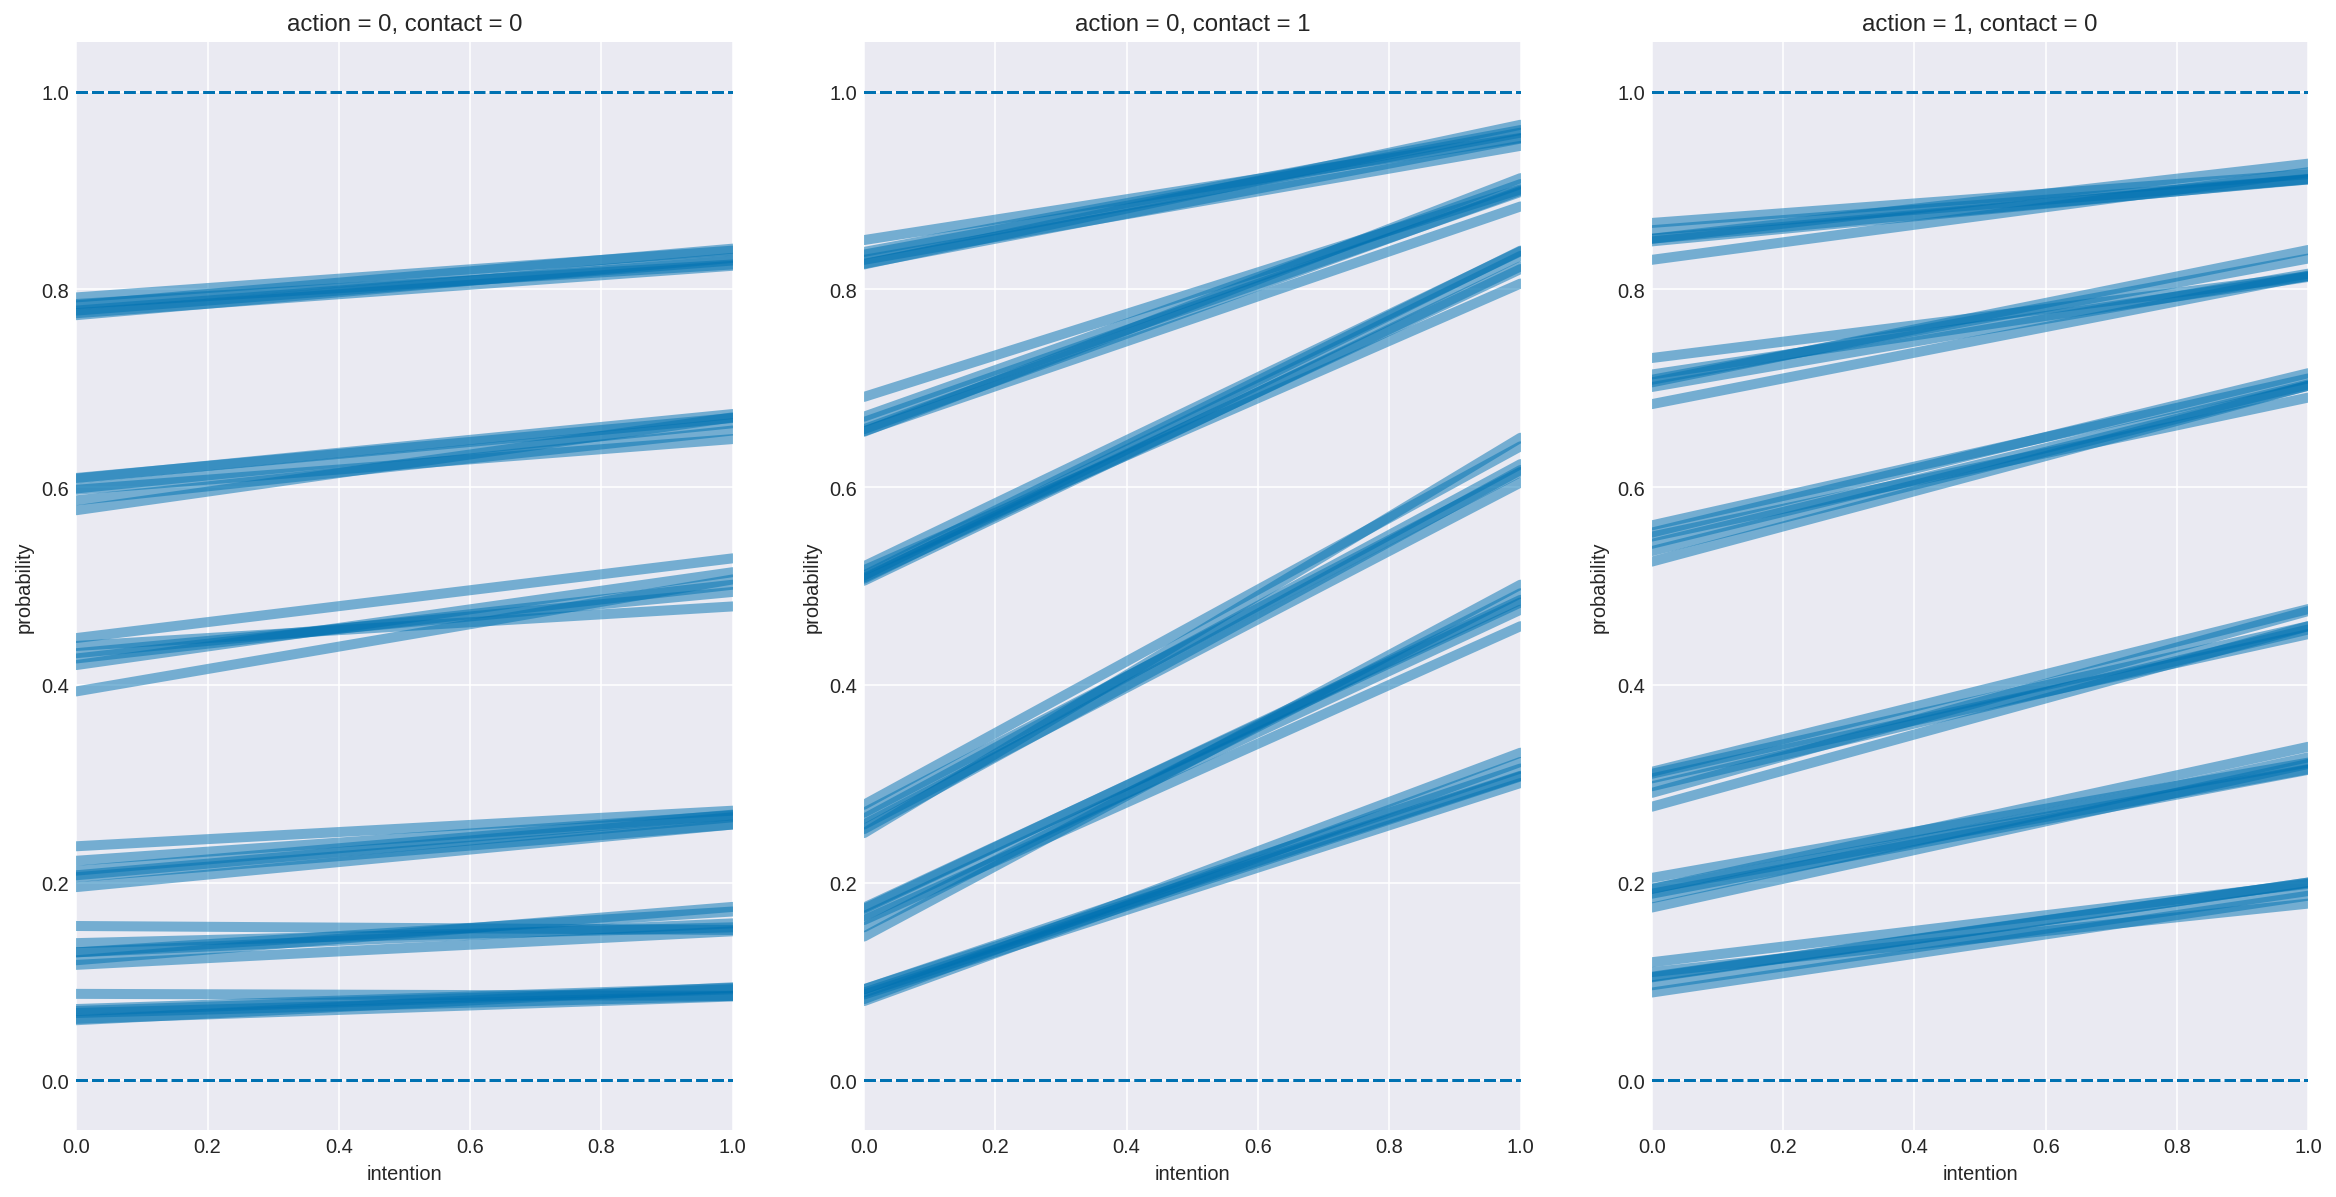

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(20,10))

for temp_pp_df in list_dfs:
    temp_pp_df = temp_pp_df.pivot_table(
                   index=['action', 'contact', 'intention']
                )
    for ax, ((plot_action, plot_contact), plot_df) in zip(axs.ravel(), 
                                                          temp_pp_df.groupby(level=['action', 'contact'])):
        ax.plot([0, 1], plot_df, c='C0', alpha=0.5, lw=5);
        ax.plot([0, 1], [0, 0], '--', c='C0');
        ax.plot([0, 1], [1, 1], '--', c='C0');

        ax.set_xlim(0, 1);
        ax.set_xlabel("intention");

        ax.set_ylim(-0.05, 1.05);
        ax.set_ylabel("probability");

        ax.set_title(
            "action = {action}, contact = {contact}".format(
                action=plot_action, contact=plot_contact
            )
        );

#### Code 11.20

In [34]:
# define parameters
PROB_DRINK = 0.2 # 20% of days
RATE_WORK = 1. # average 1 manuscript per day

# sample one year of production
N = 365

In [35]:
drink = np.random.binomial(1, PROB_DRINK, size=N)
y = (1 - drink) * np.random.poisson(RATE_WORK, size=N)

#### Code 11.21

In [36]:
drink_zeros = drink.sum()
work_zeros = (y == 0).sum() - drink_zeros

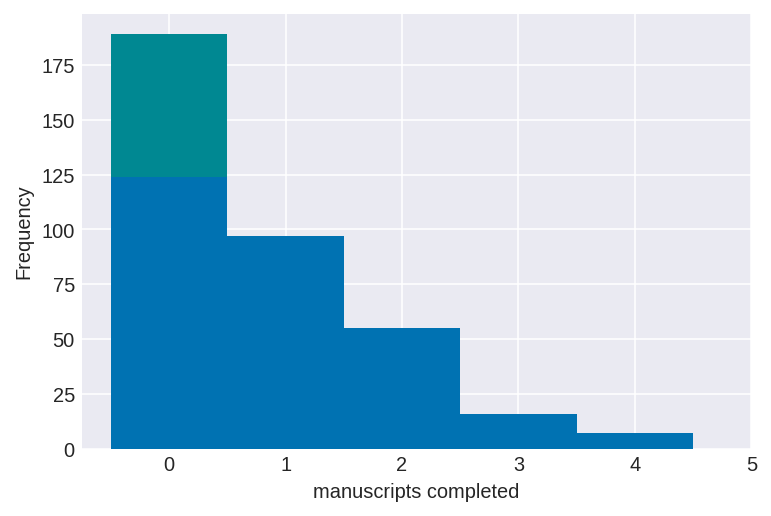

In [37]:
bins = np.arange(y.max() + 1) - 0.5

plt.hist(y, bins=bins);
plt.bar(0., drink_zeros, width=1., bottom=work_zeros, color='C1', alpha=.5);

plt.xticks(bins + 0.5);
plt.xlabel("manuscripts completed");

plt.ylabel("Frequency");

#### Code 11.22

In [38]:
with pm.Model() as m11_4:
    ap = pm.Normal('ap', 0., 1.)
    p = pm.math.sigmoid(ap)
    
    al = pm.Normal('al', 0., 10.)
    lambda_ = tt.exp(al)
    
    y_obs = pm.ZeroInflatedPoisson('y_obs', 1. - p, lambda_, observed=y)

In [39]:
with m11_4:
    map_11_4 = pm.find_MAP()

/home/damianos/.conda/envs/statRethinkPymc3/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -467.76, ||grad|| = 75.544: 100%|██████████| 11/11 [00:00<00:00, 1967.39it/s]


In [40]:
map_11_4

{'ap': array(-0.92928372), 'al': array(0.09229256)}

#### Code 11.23

In [41]:
sp.special.expit(map_11_4['ap']) # probability drink

0.2830700546171968

In [42]:
np.exp(map_11_4['al']) # rate finish manuscripts, when not drinking

1.0966856244306653

#### Code 11.24

In [43]:
def dzip(x, p, lambda_, log=True):
    like = p**(x == 0) + (1 - p) * sp.stats.poisson.pmf(x, lambda_)
    
    return np.log(like) if log else like

#### Code 11.25

In [44]:
PBAR = 0.5
THETA = 5.

In [45]:
a = PBAR * THETA
b = (1 - PBAR) * THETA

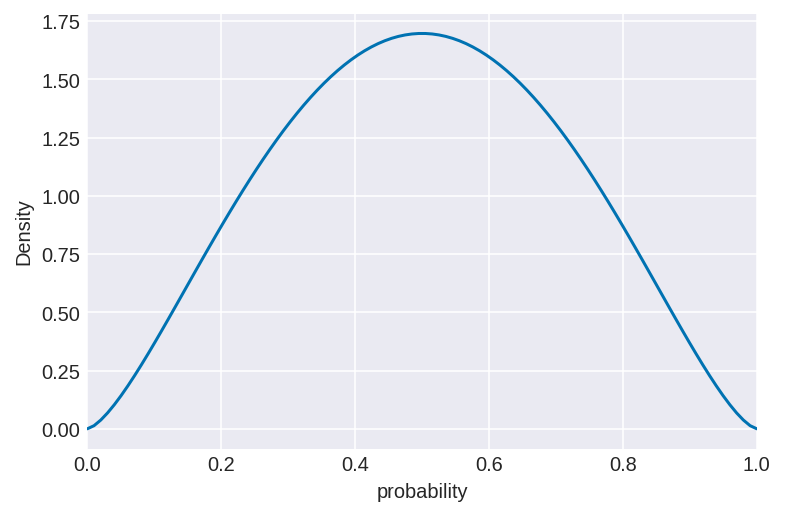

In [46]:
p = np.linspace(0, 1, 100)

plt.plot(p, sp.stats.beta.pdf(p, a, b));

plt.xlim(0, 1);
plt.xlabel("probability");

plt.ylabel("Density");

#### Code 11.26

In [47]:
admit_df = pd.read_csv('Data/UCBadmit.csv', sep=';')
admit_df.head()

,dept,applicant.gender,admit,reject,applications
1,A,male,512,313,825
2,A,female,89,19,108
3,B,male,353,207,560
4,B,female,17,8,25
5,C,male,120,205,325


In [48]:
with pm.Model() as m11_5:
    a = pm.Normal('a', 0., 2.)
    pbar = pm.Deterministic('pbar', pm.math.sigmoid(a))

    theta = pm.Exponential('theta', 1.)
    
    admit_obs = pm.BetaBinomial(
        'admit_obs',
        pbar * theta, (1. - pbar) * theta,
        admit_df.applications.values,
        observed=admit_df.admit.values
    )

In [49]:
with m11_5:
    trace_11_5 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta, a]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:02<00:00, 1717.74draws/s]


#### Code 11.27

In [50]:
pm.summary(trace_11_5, alpha=.11).round(2)

,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
a,-0.36,0.32,0.01,-0.85,0.17,1735.41,1.0
pbar,0.41,0.08,0.00,0.29,0.53,1738.40,1.0
theta,2.72,0.94,0.02,1.23,4.10,1809.49,1.0


#### Code 11.28

In [51]:
np.percentile(trace_11_5['pbar'], [2.5, 50., 97.5])

array([0.27271728, 0.41074945, 0.56989978])

#### Code 11.29

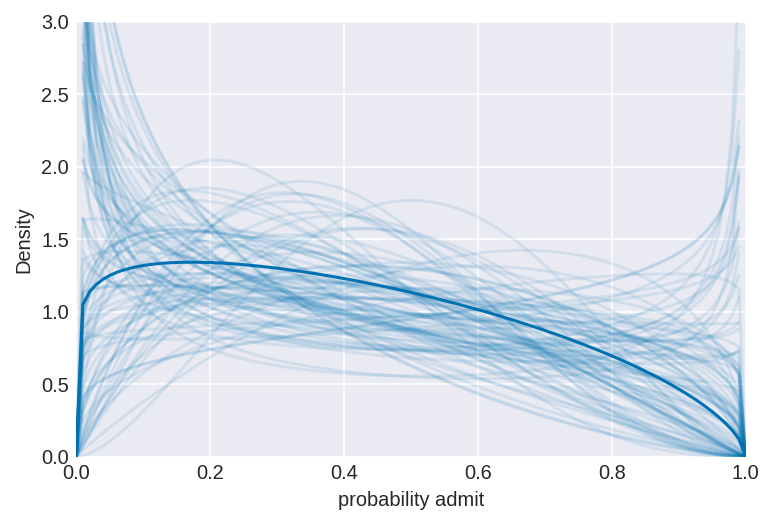

In [52]:
pbar_hat = trace_11_5['pbar'].mean()
theta_hat = trace_11_5['theta'].mean()

p_plot = np.linspace(0, 1, 100)

plt.plot(
    p_plot,
    sp.stats.beta.pdf(p_plot, pbar_hat * theta_hat, (1. - pbar_hat) * theta_hat)
);
plt.plot(
    p_plot,
    sp.stats.beta.pdf(
        p_plot[:, np.newaxis],
        trace_11_5['pbar'][:100] * trace_11_5['theta'][:100],
        (1. - trace_11_5['pbar'][:100]) * trace_11_5['theta'][:100]
    ),
    c='C0', alpha=0.1
);

plt.xlim(0., 1.);
plt.xlabel("probability admit");

plt.ylim(0., 3.);
plt.ylabel("Density");

#### Code 11.30

In [53]:
with m11_5:
    pp_trace_11_5 = pm.sample_ppc(trace_11_5)

/home/damianos/.conda/envs/statRethinkPymc3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  
100%|██████████| 2000/2000 [00:02<00:00, 834.76it/s]


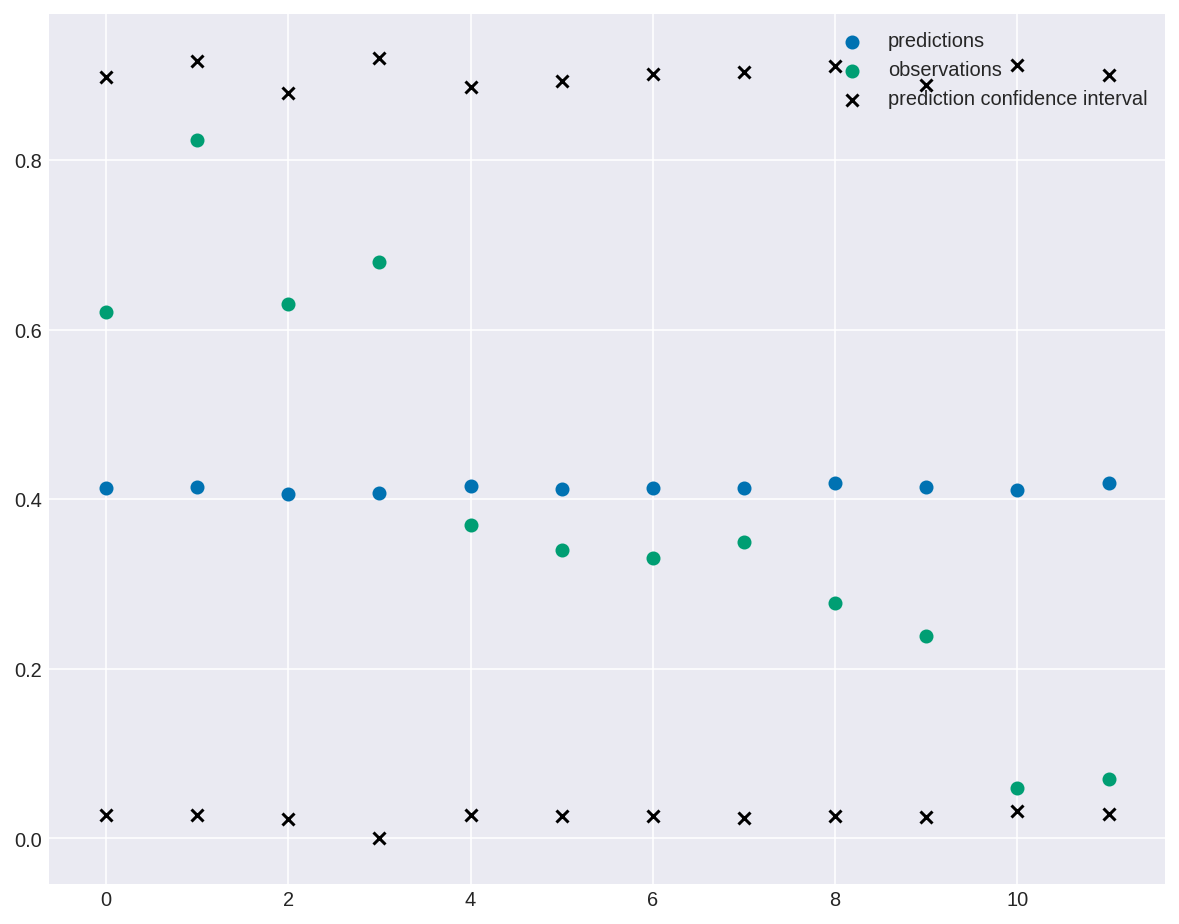

In [54]:
x_case = np.arange(admit_df.shape[0])
plt.figure(figsize=(10,8))
plt.scatter(
    x_case,
    pp_trace_11_5['admit_obs'].mean(axis=0) \
        / admit_df.applications.values, label='predictions'
);
plt.scatter(x_case, admit_df.admit / admit_df.applications, label='observations');

high = np.percentile(pp_trace_11_5['admit_obs'], 95, axis=0) \
        / admit_df.applications.values
plt.scatter(x_case, high, marker='x', c='k', label='prediction confidence interval');

low = np.percentile(pp_trace_11_5['admit_obs'], 5, axis=0) \
        / admit_df.applications.values
plt.scatter(x_case, low, marker='x', c='k');
plt.legend();

#### Code 11.31

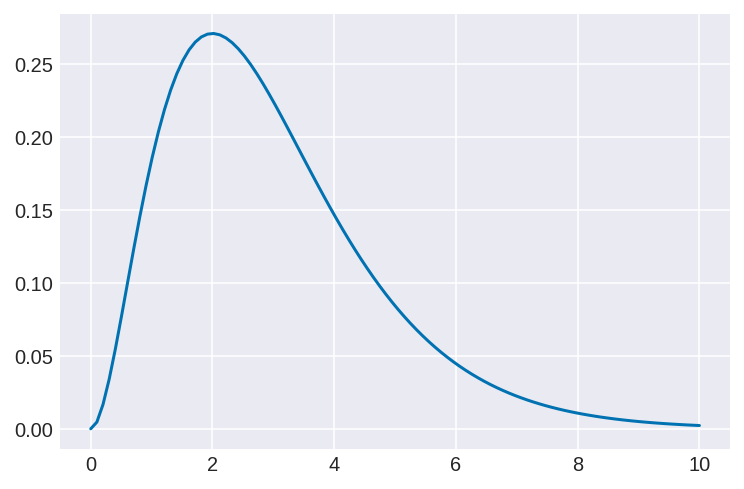

In [55]:
mu = 3.
theta = 1.

x = np.linspace(0, 10, 100)
plt.plot(x, sp.stats.gamma.pdf(x, mu / theta, scale=theta));

In [56]:
import sys, IPython, scipy, matplotlib, platform
print("This notebook was createad on a computer %s running %s and using:\nPython %s\nIPython %s\nPyMC3 %s\nNumPy %s\nPandas %s\nSciPy %s\nMatplotlib %s\n" % (platform.machine(), ' '.join(platform.linux_distribution()[:2]), sys.version[:5], IPython.__version__, pm.__version__, np.__version__, pd.__version__, scipy.__version__, matplotlib.__version__))

This notebook was createad on a computer x86_64 running debian stretch/sid and using:
Python 3.7.2
IPython 7.6.1
PyMC3 3.6
NumPy 1.16.0
Pandas 0.23.4
SciPy 1.2.0
Matplotlib 3.0.2



/home/damianos/.conda/envs/statRethinkPymc3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: dist() and linux_distribution() functions are deprecated in Python 3.5
  
